# Exploration

In [2]:
import numpy as np

slot_machine = 5
trials = 1000
mean = np.random.randint(1, 10, size=slot_machine)
cumulative_reward = 0
average_rewards = [0] * slot_machine

for t in range(trials):
    action = np.random.randint(slot_machine)
    reward = np.random.normal(mean[action], 1)
    cumulative_reward += reward

    for slots in range(slot_machine):
        average_rewards[slots] += (reward - average_rewards[slots]) / (t + 1)

print("Cumulative Reward is", cumulative_reward)
for i in range(slot_machine):
    print(f"Machine {chr(65+i)} = True Mean: {mean[i]}, Average Reward: {average_rewards[i]:.2f}")

Cumulative Reward is 4340.850691288222
Machine A = True Mean: 5, Average Reward: 4.34
Machine B = True Mean: 2, Average Reward: 4.34
Machine C = True Mean: 5, Average Reward: 4.34
Machine D = True Mean: 6, Average Reward: 4.34
Machine E = True Mean: 3, Average Reward: 4.34


# Exploitation

In [3]:
import numpy as np

slot_machine = 5
trials = 1000
mean = np.random.randint(1, 10, size=slot_machine)
mean[0] = 4
mean[1] = 3
mean[2] = 5
mean[3] = 7
mean[4] = 2
cumulative_reward = 0
average_rewards = [0, 0, 0, 0, 0]

for t in range(trials):
    if t < slot_machine:
        action = t
    else:
        action = np.argmax(average_rewards)
    reward = np.random.normal(mean[action], 1)
    cumulative_reward += reward

    for slots in range(slot_machine):
        average_rewards[slots] += (reward - average_rewards[slots]) / (t + 1)

print(f"Cumulative Reward: {cumulative_reward}")
for i in range(slot_machine):
    print(f"Slot Machine {chr(65+i)} = True Mean: {mean[i]}, Average Reward: {average_rewards[i]:.2f}")

Cumulative Reward: 3976.8581726641996
Slot Machine A = True Mean: 4, Average Reward: 3.98
Slot Machine B = True Mean: 3, Average Reward: 3.98
Slot Machine C = True Mean: 5, Average Reward: 3.98
Slot Machine D = True Mean: 7, Average Reward: 3.98
Slot Machine E = True Mean: 2, Average Reward: 3.98


# Epsilon-Greedy

In [4]:
import numpy as np

slot_machine = 5
trials = 1000
mean = np.random.randint(1, 10, size=slot_machine)
epsilon = 0.1
cumulative_reward = 0
count = [0] * slot_machine
average_rewards = [0] * slot_machine

for t in range(trials):
    if np.random.random() < epsilon:
        action = np.random.randint(slot_machine)
    else:
        action = np.argmax(average_rewards)
    reward = np.random.normal(mean[action], 1)
    cumulative_reward += reward
    count[action] += 1
    average_rewards[action] += (reward - average_rewards[action]) / count[action]

print(f"Cumulative Reward: {cumulative_reward}")
for i in range(slot_machine):
    print(f"Slot Machine {chr(65+i)} = True Mean: {mean[i]}, Average Reward: {average_rewards[i]:.2f}")

Cumulative Reward: 5942.197657867853
Slot Machine A = True Mean: 5, Average Reward: 4.57
Slot Machine B = True Mean: 3, Average Reward: 2.98
Slot Machine C = True Mean: 6, Average Reward: 6.05
Slot Machine D = True Mean: 6, Average Reward: 5.96
Slot Machine E = True Mean: 6, Average Reward: 5.93


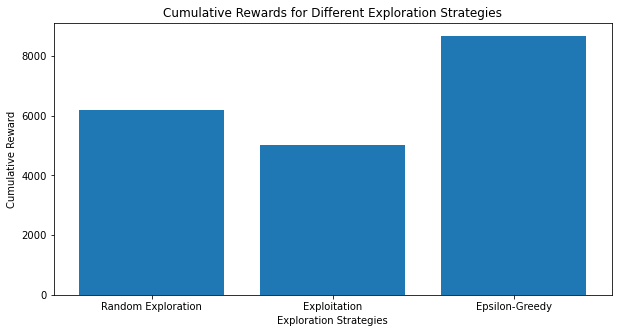

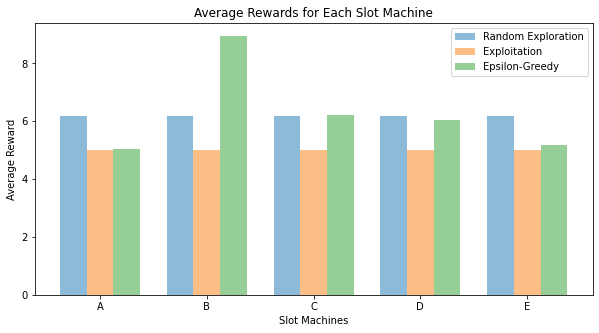

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def random_exploration(slot_machine, trials, mean):
    cumulative_reward = 0
    average_rewards = np.zeros(slot_machine)

    for t in range(trials):
        action = np.random.randint(slot_machine)
        reward = np.random.normal(mean[action], 1)
        cumulative_reward += reward
        average_rewards += (reward - average_rewards) / (t + 1)

    return cumulative_reward, average_rewards

def exploitation(slot_machine, trials, mean):
    cumulative_reward = 0
    average_rewards = np.zeros(slot_machine)

    for t in range(trials):
        action = t if t < slot_machine else np.argmax(average_rewards)
        reward = np.random.normal(mean[action], 1)
        cumulative_reward += reward
        average_rewards += (reward - average_rewards) / (t + 1)

    return cumulative_reward, average_rewards

def epsilon_greedy(slot_machine, trials, mean, epsilon):
    cumulative_reward = 0
    count = np.zeros(slot_machine)
    average_rewards = np.zeros(slot_machine)

    for t in range(trials):
        action = np.random.randint(slot_machine) if np.random.random() < epsilon else np.argmax(average_rewards)
        reward = np.random.normal(mean[action], 1)
        cumulative_reward += reward
        count[action] += 1
        average_rewards[action] += (reward - average_rewards[action]) / count[action]

    return cumulative_reward, average_rewards

# Parameters
slot_machine = 5
trials = 1000
mean = np.random.randint(1, 10, size=slot_machine)
epsilon = 0.1

# Random Exploration
random_cumulative_reward, random_average_rewards = random_exploration(slot_machine, trials, mean)

# Exploitation
exploitation_cumulative_reward, exploitation_average_rewards = exploitation(slot_machine, trials, mean)

# Epsilon-Greedy
epsilon_greedy_cumulative_reward, epsilon_greedy_average_rewards = epsilon_greedy(slot_machine, trials, mean, epsilon)

# Plot cumulative rewards
plt.figure(figsize=(10,5))
plt.bar(['Random Exploration', 'Exploitation', 'Epsilon-Greedy'], [random_cumulative_reward, exploitation_cumulative_reward, epsilon_greedy_cumulative_reward])
plt.title('Cumulative Rewards for Different Exploration Strategies')
plt.xlabel('Exploration Strategies')
plt.ylabel('Cumulative Reward')
plt.show()

# Plot average rewards
plt.figure(figsize=(10,5))
index = np.arange(slot_machine)
bar_width = 0.25
plt.bar(index, random_average_rewards, bar_width, alpha=0.5, label='Random Exploration')
plt.bar(index + bar_width, exploitation_average_rewards, bar_width, alpha=0.5, label='Exploitation')
plt.bar(index + 2 * bar_width, epsilon_greedy_average_rewards, bar_width, alpha=0.5, label='Epsilon-Greedy')
plt.xticks(index + bar_width, ['A', 'B', 'C', 'D', 'E'])
plt.title('Average Rewards for Each Slot Machine')
plt.xlabel('Slot Machines')
plt.ylabel('Average Reward')
plt.legend()
plt.show()